# Inverse Transform Sampling

This notebook will conceptualize how inverse transform sampling works

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import numpy.random as ra

%matplotlib inline

Below is a spectrum which follows an `almost` bell-curve type distribution (anyway, the specific type of distribution is not important here). 

In [118]:
spectrum = [[1, 2, 3, 4, 5, 6],[2000, 4040, 6500, 6000, 4020, 2070]]
energies = np.array(spectrum[0])
fluxes = np.array(spectrum[1])
spectrum

[[1, 2, 3, 4, 5, 6], [2000, 4040, 6500, 6000, 4020, 2070]]

Below, first we compute probabilities of flux. Afterwards, we compute the cumulative probability.

In [119]:
prob = fluxes/float(sum(fluxes))
cum_prob = np.cumsum(prob)
cum_prob

array([ 0.08120179,  0.2452294 ,  0.5091352 ,  0.75274056,  0.91595615,  1.        ])

We draw ten thousand numbers from uniform random distribution.

In [128]:
N = 10000
R = ra.uniform(0, 1, N)
R[1:10]

array([ 0.49834338,  0.31993222,  0.35882619,  0.15837646,  0.22595417,
        0.85575223,  0.85203039,  0.78380252,  0.04170078])

We assign energies to events corresponding to the random number drawn.

_Note: The command below finds bin interval using a single command. I am not sure though that it's very readble. Would
we want to split that in multiple lines and maybe use explicit loops to make it more readable? Or is it fine as it is?
Comments?_

In [129]:
gen_energies = [int(energies[np.argwhere(cum_prob == min(cum_prob[(cum_prob - r) > 0]))]) for r in R]
gen_energies[1:10]

[3, 3, 3, 2, 2, 5, 5, 5, 1]

Histogram energies to get shape approximation.

In [130]:
gen_energies = ((np.array(gen_energies) - 1) / 1).astype(int)
times = np.arange(1, 6, 1)
lc = np.bincount(gen_energies, minlength=len(times))
lc

array([ 825, 1652, 2626, 2466, 1589,  842], dtype=int64)

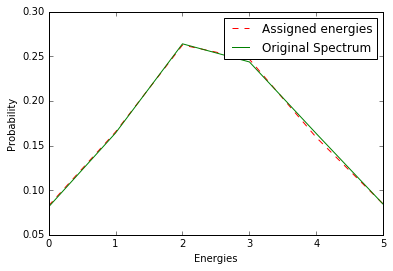

In [131]:
plot1, = plt.plot(lc/float(sum(lc)), 'r--', label='Assigned energies')
plot2, = plt.plot(prob,'g',label='Original Spectrum')
plt.xlabel('Energies')
plt.ylabel('Probability')
plt.legend(handles=[plot1,plot2])
plt.show()